In [1]:
import hypernetx as hnx
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import warnings
import warnings
warnings.filterwarnings('ignore')

## s-centrality metrics

<img src="s-width.png" width="500" align="left" style="margin-right:10px">

Hypergraph metrics generalize traditional graph metrics by including parameters for edge size and edge intersection size. In the figure there are two hypergraphs. Each illustrates an edge path of length 2, connecting Blue, Orange, and Green. The path in hypergraph I. has *width* 1, while the path in hypergraph II. has *width* 3. The width of an edge path is the size of the smallest intersection.

While graphs use shortest paths to define a distance metric, hypergraphs can stipulate a width parameter **s** to the shortest path. The edge s-distance between two edges is the shortest path of width **s** between the edges. The s-distance between two nodes has an analogous definition replacing the size of edge intersection with the number of shared edges between consecutive nodes. Because the intuition around edge s-distance seems more natural than node distance we will refer to s-distance in terms of edges unless stated otherwise and use the dual of the hypergraph when considering the s-distance between nodes.

For a detailed exposition of s-distance metrics and hypergraph walks in general see: Aksoy, S.G., Joslyn, C., Ortiz Marrero, C. et al. Hypernetwork science via high-order hypergraph walks. EPJ Data Sci. 9, 16 (2020). https://doi.org/10.1140/epjds/s13688-020-00231-0  

In this tutorial we will provide just enough information to provide some intuition about the s-parameter and s-metrics. As described above, s-distance is a true metric on the edges of a hypergraph. We use s-distance to define s-connectedness, s-centrality, s-Motifs, as well as other analogs to well known graph concepts.  



## example

Text(0.5, 1.0, 'hypergraph')

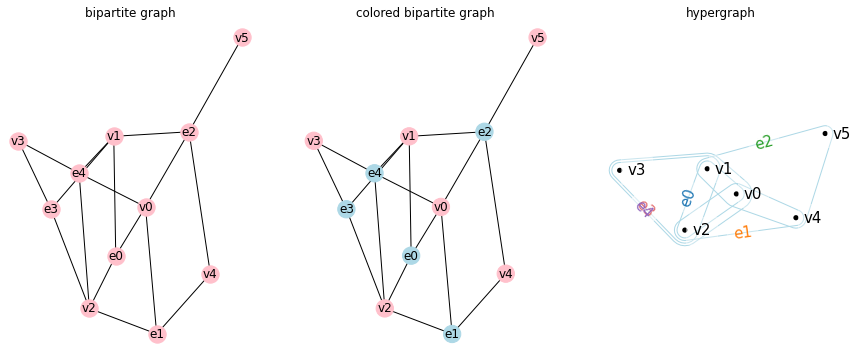

In [2]:
class SixByFive():
    """Example hypergraph with 6 nodes and 5 edges"""

    def __init__(self):
        mat = np.array([[1, 1, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0], [1, 1, 0, 0, 1, 1], [0, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 0]]).transpose()
        self.hypergraph = hnx.Hypergraph.from_numpy_array(mat)

fig,ax = plt.subplots(1,3,figsize=(15,6))

sbf = SixByFive()
h2 = sbf.hypergraph


G = h2.bipartite()
pos = nx.spring_layout(G)
cmap = ['pink' if G.nodes[n]['bipartite']==0 else 'lightblue' for n in G.nodes ]
ax[0].set_title("bipartite graph")
nx.draw(G, ax=ax[0], pos=pos, node_color='pink',with_labels=True)
ax[1].set_title("colored bipartite graph")
nx.draw(G,node_color=cmap, ax = ax[1], with_labels=True, pos=pos)
hnx.draw(h2,ax=ax[2],pos=pos, 
         edges_kwargs={'edgecolor':'lightblue'}, 
         node_labels_kwargs={'fontsize':15},
         edge_labels_kwargs={'fontsize':15})
ax[2].set_title('hypergraph')


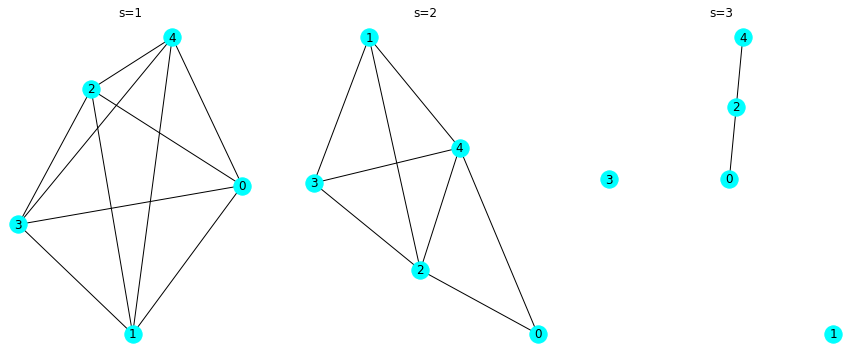

In [3]:
## s-line graphs for s = 1,2,3
fig,ax = plt.subplots(1,3,figsize=(15,6))
A = dict()
g = dict()
for i in range(1,4):
    A[i] = h2.edge_adjacency_matrix(s=i).todense()
    g[i] = nx.from_numpy_matrix(A[i])  ## corresponding line graph
    ax[i-1].set_title(f's={i}')
    nx.draw(g[i],ax=ax[i-1],with_labels=True, node_color='cyan');

In [4]:
## normalized metric for average s-distance from every other edge
hnx.s_harmonic_closeness_centrality(h2,s=1)

{'e0': 1.0, 'e1': 1.0, 'e2': 1.0, 'e3': 1.0, 'e4': 1.0}

In [5]:
hnx.s_harmonic_closeness_centrality(h2,s=2)

{'e0': 1.0, 'e1': 0.875, 'e2': 0.875, 'e3': 0.75, 'e4': 1.0}

In [6]:
hnx.s_harmonic_closeness_centrality(h2,s=3)

{'e0': 0.375, 'e1': 0.0, 'e2': 0.0, 'e3': 0.375, 'e4': 0.5}

In [7]:
## Max s-distance from every other edge
hnx.s_eccentricity(h2,s=1)

{'e0': 1, 'e1': 1, 'e2': 1, 'e3': 1, 'e4': 1}

In [8]:
hnx.s_eccentricity(h2,s=2)

{'e0': 1, 'e1': 2, 'e2': 2, 'e3': 2, 'e4': 1}

In [9]:
hnx.s_eccentricity(h2,s=3)

{'e0': 2, 'e1': 0, 'e2': 0, 'e3': 2, 'e4': 1}

In [10]:
## centrality of edge to all shortest s-edge paths
hnx.s_betweenness_centrality(h2, s=1, normalized=False)

{'e3': 0.0, 'e2': 0.0, 'e4': 0.0, 'e1': 0.0, 'e0': 0.0}

In [11]:
hnx.s_betweenness_centrality(h2, s=2, normalized=False)

{'e3': 0.0, 'e2': 0.0, 'e4': 1.0, 'e1': 0.0, 'e0': 1.0}

In [12]:
hnx.s_betweenness_centrality(h2, s=3, normalized=False)

{'e3': 0.0, 'e2': 0.0, 'e4': 1.0, 'e1': 0.0, 'e0': 0.0}